# Challenge 1

In [12]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random
from sklearn import metrics

In [17]:
x=np.array([random.randint(1,100) for i in range(100)])

In [80]:
y=np.array([np.log(i)+random.gauss(np.log(i),5) for i in x])

In [81]:
x=x.reshape(100,1)
y=y.reshape(100,1)


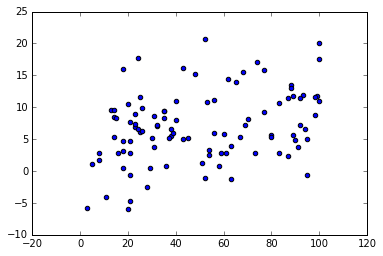

In [88]:
plt.scatter(x,y)


In [83]:
#regular linear model
linreg= LinearRegression()
linreg.fit(x,y)
metrics.mean_squared_error(y,linreg.predict(x))


26.896362778941789

In [84]:
#logarithmic model
linreg_2= LinearRegression()
linreg_2.fit(np.log(x),y)
metrics.mean_squared_error(y,linreg_2.predict(np.log(x)))

26.161668040815922

In [85]:
#exponential model
linreg_3= LinearRegression()
linreg_3.fit(x**2,y)
metrics.mean_squared_error(y,linreg_3.predict(x**2))

27.272641768977781

# Challenge 2

In [89]:
x2=np.array([random.randint(1,100) for i in range(100)])
y2=np.array([i**2+i+random.gauss((i**2+i),5) for i in x2])

In [90]:
x2=x2.reshape(100,1)
y2=y2.reshape(100,1)

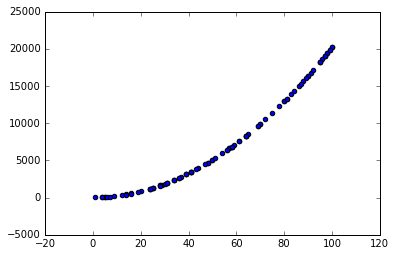

In [98]:
plt.scatter(x2,y2)

In [91]:
from sklearn.cross_validation import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2,test_size=.30, random_state=4444)

In [99]:
#pretending it's a regular linear fit
linreg_4 = LinearRegression()

linreg_4.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
#MSE on training set
metrics.mean_squared_error(y2_train,linreg_4.predict(x2_train))

2430077.6932201479

In [101]:
#MSE on test set
metrics.mean_squared_error(y2_test,linreg_4.predict(x2_test))

2420313.6689443011

In [103]:
# tranform the x to quadratic
linreg_5 = LinearRegression()
linreg_5.fit(x2_train**2 +x2_train,y2_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
metrics.mean_squared_error(y2_train,linreg_5.predict(x2_train**2+x2_train))

27.675431239489267

In [105]:
metrics.mean_squared_error(y2_test,linreg_5.predict(x2_test**2+x2_test))

26.350176779109411

# Challenge 3

In [146]:
from sklearn.preprocessing import PolynomialFeatures
degree=[]
train_err=[]
test_err=[]
r_squared=[]
AIC=[]
for i in range(0,8):
    poly = PolynomialFeatures(degree=i)
    poly_x = poly.fit_transform(x2_train)
    poly_xt=poly.fit_transform(x2_test)
    linreg_6 = LinearRegression()
    linreg_6.fit(poly_x,y2_train)
    degree.append(i)
    train_err.append(metrics.mean_squared_error(y2_train,linreg_6.predict(poly_x)))
    test_err.append(metrics.mean_squared_error(y2_test,linreg_6.predict(poly_xt)))
    r_squared.append(metrics.r2_score(y2_train, linreg_6.predict(poly_x)))
#I'm no sure how to show AIC in sklearn    

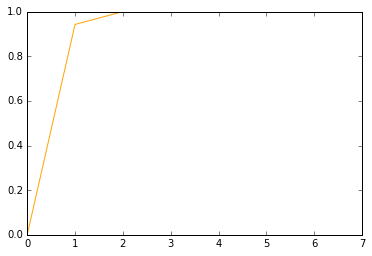

In [156]:
#r squared raidly improves with more dimensions
plt.plot(degree,r_squared,color='orange')

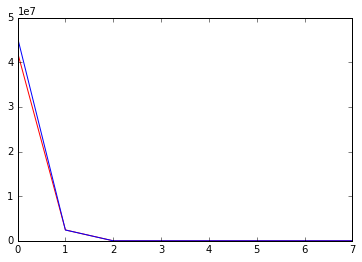

In [157]:
# the training and test error rapidly fall with more dimensions
plt.plot(degree,train_err,color='red')
plt.plot(degree,test_err,color='blue')

# Challenge 4

In [184]:
train_setx=[]
train_sety=[]
test_setx=[]
test_sety=[]
index=[]
for i in range(5,100,5):
    train_setx.append(x2[:i])
    train_sety.append(y2[:i])
    test_setx.append(x2[i:])
    test_sety.append(y2[i:])
    index.append(i)

In [185]:
train_mse=[]
test_mse=[]
for i in range(19):
    poly = PolynomialFeatures(degree=2)
    poly_x = poly.fit_transform(train_setx[i])
    poly_xt= poly.fit_transform(test_setx[i])
    linreg_7 = LinearRegression()
    linreg_7.fit(poly_x,train_sety[i])
    train_mse.append(metrics.mean_squared_error(train_sety[i],linreg_7.predict(poly_x)))
    test_mse.append(metrics.mean_squared_error(test_sety[i],linreg_7.predict(poly_xt)))

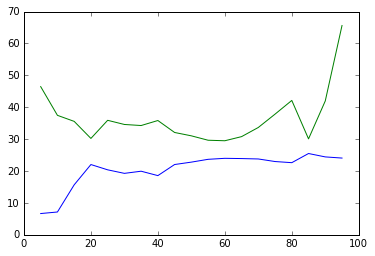

In [188]:
#as the training set gets larger, the mse of it goes up, but that of the test goes down
plt.plot(index,train_mse)
plt.plot(index,test_mse)